<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_551_nesting_a_bunch_of_brackets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

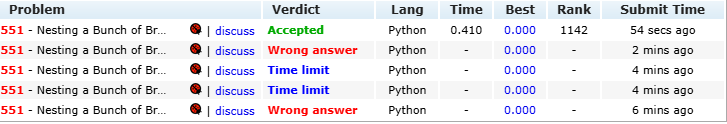

**@PDF: [UVA 551 - Nesting a Bunch of Brackets](https://onlinejudge.org/external/5/551.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 551 Nesting a Bunch of Brackets

In this problem we consider expressions containing brackets that are properly nested. These expressions are obtained by juxtaposition of properly netsted expressions in a pair of matching brackets, the left one an opening and the right one a closing bracket.

`(a+$ (b=) (a))` is properly nested

`(a+$) b=) (a()` is not

In this problem we have several pairs of brackets, so we have to impose a second condition on the expression: the matching brackets should be of the same kind. Consequently `'(()'` is OK, but `'([))'` is not. The pairs of brackets are:

`()`

`[]`

`{}`

`<>`

`(* *)`

The two characters `(*` should be interpreted as one symbol, not as an opening bracket `(` followed immediately by an asterisk, and similarly for `*)`. The combination `(*)` should be interpreted as `(*` followed by `)`.

Write a program that checks wheter expressions are properly nested. If the expression is not properly nested your program should determine the position of the offending bracket, that is the length of the shortest prefix of the expression that can not be extended to a properly nested expression. Don't forget '(*' counts as one, as does '*)'. The characters that are not brackets also count as one.

## Input

The input is a text-file. Each line contains an expression to be checked followed by and end-of-line marker. No line contains more than 3000 characters. The input ends with a standard end-of-file marker.

## Output

The output is a textfile. Each line contains the result of the check of the corresponding inputline, that is 'YES' (in upper case), if the expression is OK, and (if it is not OK) 'NO' followed by a space and the position of the error.

## Sample Input

(a++()\
(a{+})


## Sample Output

NO 6\
YES


In [ ]:
from sys import stdin, stdout

while True:  # Outer loop: Reads input until EOF (end of file)
    text = stdin.readline()  # Read a line from standard input
    if text == "":  # Check for EOF
        break  # Exit the loop if the line is empty (EOF)

    l1 = len(text)  # Store the original length of the line
    text = text.lstrip()  # Remove leading whitespace from the line
    offset = l1 - len(text)  # Calculate how much leading whitespace was removed
    text = text.rstrip()  # Remove trailing whitespace from the line

    stack = []  # Initialize an empty stack to keep track of opening characters
    valid = True  # Initialize a boolean variable to track validity (so far, so good)

    index = 1  # Initialize an index to keep track of character position (1-based index)
    i = 0  # Initialize a loop counter
    while i < len(text):  # Inner loop: Iterate through each character of the line
        ch = text[i]  # Get the current character
        if ch in "[({<":  # Check if the character is an opening bracket type
            if ch == "(":  # Special case for '(*' comments
                if i < len(text) - 1 and text[i+1] == "*":  # Check if it's the start of a comment
                    stack.append("(*")  # Push '(*' onto the stack
                    i += 1  # Advance the loop counter to skip the '*'
                else:
                    stack.append("(")  # Otherwise, push '('
            else:
                stack.append(ch)  # Push the opening bracket onto the stack

        elif ch in "*])}>":  # Check if the character is a closing bracket or '*'
            if ch == "*":  # Special case for '*)' comments
                if i < len(text) - 1 and text[i+1] == ")":  # Check if it's the end of a comment
                    i += 1  # Advance the loop counter to skip the ')'
                    if len(stack) == 0:  # Check if the stack is empty (nothing to match)
                        valid = False  # Invalid: Closing comment without opening
                        break  # Exit the inner loop
                    t_ch = stack.pop()  # Pop the last opening character
                    if t_ch != "(*":  # Check if it matches the opening comment
                        valid = False  # Invalid: Comment brackets don't match
                        break  # Exit the inner loop
                # else:  # This 'else' is redundant, as the outer 'if' already checks for ')'
                #     valid = False  # Invalid: '*' not followed by ')'
                #     break
            else:  # Handling regular closing brackets
                if len(stack) == 0:  # Check if the stack is empty (nothing to match)
                    valid = False  # Invalid: Closing bracket without opening
                    break  # Exit the inner loop
                t_ch = stack.pop()  # Pop the last opening character
                if t_ch == "[" and ch != "]":  # Check for matching brackets
                    valid = False  # Invalid: Mismatched brackets
                    break  # Exit the inner loop
                if t_ch == "{" and ch != "}":
                    valid = False
                    break
                if t_ch == "<" and ch != ">":
                    valid = False
                    break
                if t_ch == "(" and ch != ")":
                    valid = False
                    break
                if t_ch == "(*" and ch != "*)":
                    valid = False
                    break

        index += 1  # Increment the character index
        i += 1  # Increment the loop counter

    valid = valid and len(stack) == 0  # After processing, the stack should be empty

    stdout.write("{}\n".format("YES" if valid else "NO {}".format(index + offset)))  # Print the result